# 1. 어떻게 하면 돈을 더 벌 수 있을까?
    # 1. 누가 (Matrix1)
    # 2. 어떤 상품을 많이 샀지? 
    # 3. 우리는 그 상품을 Sourcing하면 되나?

### 2. 구매 소요 시간 분석     
      1-1. 가입일로부터 구매일까지 전환된 소요시간 분석     
      
          ㄴ 최근 3개월 전체 분석 / 각 월 별 분석  
          
          ㄴ 분기 경향 / 월 별 변동사항 확인 -> 트렌드 분석     
          
          ex. 가입 1일 이내 전환 유저 : 10% -> 15% 상승 성과

# 가입한 당일 또는 하루가 지나 결제한 고객들
# 주차별로 묶음

In [1]:
import pandas as pd
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# plt.style.use('seaborn-whitegrid')
import os
from datetime import date

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야함.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당.
a = get_font_family()
# 폰트설정
import matplotlib.pyplot as plt 
plt.rc("font", family = a)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정
#plt.style.use("ggplot")


In [4]:
df = pd.read_excel("클로젯셰어_과제DB 대체 자료.xlsx")

In [5]:
df_Activation = df.copy()

In [6]:
df_Activation.set_index("USER", inplace=True)

In [7]:
FirstOrder = df_Activation.groupby(df_Activation.index)["order_date"].min()

In [8]:
df_Activation['FirstOrder'] = FirstOrder

In [9]:
df_Activation.head(2)

,brandnm,goodsnm,reg_date,order_date,p_type,sub_type,app_yn,FirstOrder
USER,,,,,,,,
a161237,Gucci,flower dionysus shoulder bag beige,2019-12-06,2021-01-15,7days,BA,Y,2021-01-15
a1140859,El estilo de Claire,beads cropped jacket black,2021-01-02,2021-01-15,4days,O,NaN,2021-01-15


In [10]:
How_Long = df_Activation["FirstOrder"] - df_Activation["reg_date"]

In [11]:
df_Activation["How_Long"] = How_Long

In [12]:
df_Activation_1 = df_Activation

In [13]:
df_Activation_1.drop(["brandnm","goodsnm","p_type","sub_type","app_yn"], axis=1,inplace=True)

In [14]:
df_Activation_1.head(3)

,reg_date,order_date,FirstOrder,How_Long
USER,,,,
a161237,2019-12-06,2021-01-15,2021-01-15,406 days
a1140859,2021-01-02,2021-01-15,2021-01-15,13 days
a1140859,2021-01-02,2021-01-15,2021-01-15,13 days


In [15]:
df_Activation_1.reset_index(inplace=True)

In [16]:
df_Activation_1.head(2)

,USER,reg_date,order_date,FirstOrder,How_Long
0,a161237,2019-12-06,2021-01-15,2021-01-15,406 days
1,a1140859,2021-01-02,2021-01-15,2021-01-15,13 days


In [17]:
#df_Activation_1["Week_Cohort"] = df_Activation_1["Week_Cohort"].astype(int)

In [18]:
# df_Activation_1["Week_Cohort"] = df_Activation_1["How_Long"].astype(int)

In [19]:
#df_Activation_1.info

In [20]:
df_Activation_1 = df_Activation_1.query('How_Long == "0 days" or How_Long == "1 days"')

In [21]:
#df_Activation_1["FirstOrder"].min()

In [22]:
#df_Activation_1["FirstOrder"].max()

In [23]:
df_Activation_1["FirstOrder"].min()

Timestamp('2021-01-03 00:00:00')

In [24]:
First_Day = df_Activation_1["FirstOrder"].min()

In [25]:
#First_Day

Timestamp('2021-01-03 00:00:00')

In [26]:
#df_Activation_1["FirstOrder"].iloc[1] <= First_Day + pd.DateOffset(days=6)

False

In [27]:
week = []
for x in range(len(df_Activation_1)):
    if df_Activation_1["FirstOrder"].iloc[x] <= First_Day + pd.DateOffset(days=6):
        week.append("1")
    elif First_Day + pd.DateOffset(days=6) < df_Activation_1["FirstOrder"].iloc[x]  <= First_Day + pd.DateOffset(days=6*2):
        week.append("2")
    elif First_Day + pd.DateOffset(days=6*2) < df_Activation_1["FirstOrder"].iloc[x] <= First_Day + pd.DateOffset(days=6*3):
        week.append("3")
    elif First_Day + pd.DateOffset(days=6*3) < df_Activation_1["FirstOrder"].iloc[x] <= First_Day + pd.DateOffset(days=6*4):
        week.append("4")
    elif First_Day + pd.DateOffset(days=6*4) < df_Activation_1["FirstOrder"].iloc[x] <=  First_Day + pd.DateOffset(days=6*5):
        week.append("5")
    elif First_Day + pd.DateOffset(days=6*5) < df_Activation_1["FirstOrder"].iloc[x] <=  First_Day + pd.DateOffset(days=6*6):
        week.append("6")
    elif First_Day + pd.DateOffset(days=6*6) < df_Activation_1["FirstOrder"].iloc[x] <=  First_Day + pd.DateOffset(days=6*7):
        week.append("7")
    elif First_Day + pd.DateOffset(days=6*7) < df_Activation_1["FirstOrder"].iloc[x] <=  First_Day + pd.DateOffset(days=6*8):
        week.append("8")
    elif First_Day + pd.DateOffset(days=6*8) < df_Activation_1["FirstOrder"].iloc[x] <= First_Day + pd.DateOffset(days=6*9):
        week.append("9")
    elif First_Day + pd.DateOffset(days=6*9) < df_Activation_1["FirstOrder"].iloc[x] <= First_Day + pd.DateOffset(days=6*10):
        week.append("10")
    elif First_Day + pd.DateOffset(days=6*10) < df_Activation_1["FirstOrder"].iloc[x] <= First_Day + pd.DateOffset(days=6*11):               
        week.append("11")
    elif First_Day + pd.DateOffset(days=6*11) <  df_Activation_1["FirstOrder"].iloc[x] <= First_Day + pd.DateOffset(days=6*12):
        week.append("12")
    elif First_Day + pd.DateOffset(days=6*12) < df_Activation_1["FirstOrder"].iloc[x] <= First_Day + pd.DateOffset(days=6*13):
        week.append("13")
    else:
        week.append("14")
        

In [28]:
df_Activation_1["Week_Cohort"] = week

In [29]:
df_Activation_1

,USER,reg_date,order_date,FirstOrder,How_Long,Week_Cohort
8,a1143028,2021-01-14,2021-01-15,2021-01-15,1 days,2
15,a1143143,2021-01-15,2021-01-15,2021-01-15,0 days,2
16,a1142921,2021-01-14,2021-01-14,2021-01-14,0 days,2
17,a1142921,2021-01-14,2021-01-14,2021-01-14,0 days,2
18,a1142834,2021-01-13,2021-01-14,2021-01-14,1 days,2
...,...,...,...,...,...,...
1463,a1147938,2021-03-01,2021-03-01,2021-03-01,0 days,10
1464,a1147932,2021-03-01,2021-03-01,2021-03-01,0 days,10
1465,a1147932,2021-03-01,2021-03-01,2021-03-01,0 days,10
1468,a1147848,2021-02-28,2021-03-01,2021-03-01,1 days,10


In [30]:
df_Activation_1["Week_Cohort"] = df_Activation_1["Week_Cohort"].astype(int)

# 특징: 하루 이내 결제한 고객군
# 시간: 주차별로 묶음

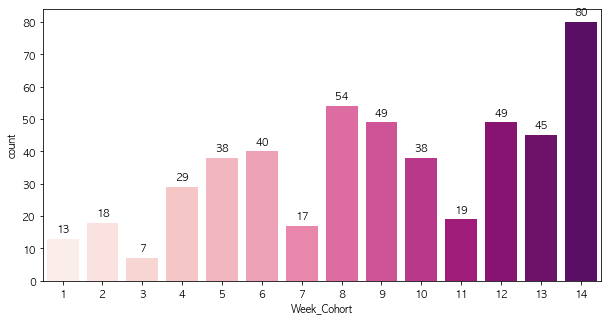

In [31]:
fig = plt.figure(figsize=(10,5)) 
splot = sns.countplot(
    x='Week_Cohort', 
    data=df_Activation_1,
    palette="RdPu")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

- 왜 3주차, 7주차, 11주차에는 고객들의 전환율이 낮을까?
    - 어떤 브랜드?
    - 어떤 아이템? 
    - 날짜? 날씨? 공휴일?

#  3주차 그룹 분석

In [32]:
# 하루이내결제_3주차 = df_Activation_1[df_Activation_1["Week_Cohort"] == 3]["USER"].to_list()

In [33]:
# 하루이내결제_3주차

['a1143948',
 'a1143946',
 'a1143945',
 'a1143917',
 'a1143909',
 'a1143692',
 'a1143683']

## 3주차 그룹 DataFrame

In [34]:
# df_Activation_1_3 = df_Activation_1[df_Activation_1["Week_Cohort"] == 3]
# merge_left = pd.merge(df_Activation_1_3,df, how="left", on="USER")
# merge_left.drop(["reg_date_y","order_date_y"],axis=1,inplace=True)
# merge_left.rename(columns={"reg_date_x":"reg_date", "order_date_x":"order_date"},inplace=True)

In [40]:
# merge_left

,USER,reg_date,order_date,FirstOrder,How_Long,Week_Cohort,brandnm,goodsnm,p_type,sub_type,app_yn
0,a1143948,2021-01-21,2021-01-21,2021-01-21,0 days,3,Louis Vuitton,logo chain tote bag black,4days,BA,Y
1,a1143946,2021-01-21,2021-01-21,2021-01-21,0 days,3,ACNE STUDIOS,basic pattern sweater navy,7days,T,Y
2,a1143945,2021-01-21,2021-01-21,2021-01-21,0 days,3,Mulberry,lily bag brown multi,4days,BA,NaN
3,a1143917,2021-01-20,2021-01-20,2021-01-20,0 days,3,Jacquemus,ribbon pointed rib sweater white,4days,T,Y
4,a1143909,2021-01-20,2021-01-20,2021-01-20,0 days,3,Prada,button basic pattern coat black,4days,O,NaN
5,a1143692,2021-01-18,2021-01-18,2021-01-18,0 days,3,Chloe,marcie cross bag brown,4days,BA,NaN
6,a1143683,2021-01-18,2021-01-18,2021-01-18,0 days,3,Gucci,GG clutch chain bag,4days,BA,Y


In [57]:
# merge_left["How_Long"].value_counts()

0 days    7
Name: How_Long, dtype: int64

## 7주차 그룹 DataFrame

In [41]:
df_Activation_1_7 = df_Activation_1[df_Activation_1["Week_Cohort"] == 7]
merge_left_7 = pd.merge(df_Activation_1_7,df, how="left", on="USER")
merge_left_7.drop(["reg_date_y","order_date_y"],axis=1,inplace=True)
merge_left_7.rename(columns={"reg_date_x":"reg_date", "order_date_x":"order_date"},inplace=True)

In [42]:
#merge_left_7.drop(["reg_date_y","order_date_y"],axis=1,inplace=True)

In [43]:
#merge_left_7.rename(columns={"reg_date_x":"reg_date", "order_date_x":"order_date"},inplace=True)

In [44]:
merge_left_7

,USER,reg_date,order_date,FirstOrder,How_Long,Week_Cohort,brandnm,goodsnm,p_type,sub_type,app_yn
0,a1146306,2021-02-13,2021-02-14,2021-02-14,1 days,7,Prada,pionniere bag brown,7days,BA,Y
1,a1146283,2021-02-13,2021-02-14,2021-02-14,1 days,7,Saint Laurent,monogram chain wallet bag black,4days,BA,NaN
2,a1146305,2021-02-13,2021-02-14,2021-02-14,1 days,7,Gucci,wood handle dionysus bag,4days,BA,Y
3,a1146300,2021-02-13,2021-02-13,2021-02-13,0 days,7,Gucci,dionysos velvet chain shoulder bag navy,7days,BA,Y
4,a1146242,2021-02-13,2021-02-13,2021-02-13,0 days,7,Wai Kei,pocket basic pattern padding-outer skyblue,4days,O,NaN
5,a1146209,2021-02-12,2021-02-12,2021-02-12,0 days,7,Louis Vuitton,vanity bag brown,7days,BA,Y
6,a1146195,2021-02-12,2021-02-12,2021-02-12,0 days,7,Dewl,rose printing dress black,4days,D,Y
7,a1146195,2021-02-12,2021-02-12,2021-02-12,0 days,7,Gucci,padlock GG canvas shoulder bag,4days,BA,Y
8,a1146195,2021-02-12,2021-02-12,2021-02-12,0 days,7,Dewl,rose printing dress black,4days,D,Y
9,a1146195,2021-02-12,2021-02-12,2021-02-12,0 days,7,Gucci,padlock GG canvas shoulder bag,4days,BA,Y


In [58]:
merge_left_7["How_Long"].value_counts()

0 days    15
1 days     6
Name: How_Long, dtype: int64

## 11주차 그룹 DataFrame

In [45]:
df_Activation_1_11 = df_Activation_1[df_Activation_1["Week_Cohort"] == 11]
merge_left_11 = pd.merge(df_Activation_1_11,df, how="left", on="USER")
merge_left_11.drop(["reg_date_y","order_date_y"],axis=1,inplace=True)
merge_left_11.rename(columns={"reg_date_x":"reg_date", "order_date_x":"order_date"},inplace=True)

In [46]:
merge_left_11

,USER,reg_date,order_date,FirstOrder,How_Long,Week_Cohort,brandnm,goodsnm,p_type,sub_type,app_yn
0,a1148865,2021-03-10,2021-03-10,2021-03-10,0 days,11,Gucci,flap cross bag grey,7days,BA,Y
1,a1148885,2021-03-10,2021-03-10,2021-03-10,0 days,11,Celine,lined zip-up jumper black,4days,O,Y
2,a1148876,2021-03-10,2021-03-10,2021-03-10,0 days,11,Chanel,boy flab bag,7days,BA,Y
3,a1148854,2021-03-10,2021-03-10,2021-03-10,0 days,11,Time,jewerly neck dress black,4days,D,NaN
4,a1148848,2021-03-10,2021-03-10,2021-03-10,0 days,11,Gucci,dionysus shoulder bag beige,4days,BA,Y
5,a1148837,2021-03-10,2021-03-10,2021-03-10,0 days,11,Celine,monogram cross body bag brown,7days,BA,Y
6,a1148795,2021-03-09,2021-03-10,2021-03-10,1 days,11,Michaa,slit basic pattern skirt white,4days,B,Y
7,a1148780,2021-03-09,2021-03-09,2021-03-09,0 days,11,Studio Tomboy,pocket check pattern jacket charcoal,4days,O,Y
8,a1148747,2021-03-09,2021-03-09,2021-03-09,0 days,11,Saint Laurent,monogram mini universal bag black,7days,BA,Y
9,a1148750,2021-03-09,2021-03-09,2021-03-09,0 days,11,Oh L,pleats detail chevron yoke dress,4days,D,Y


In [59]:
merge_left_11["How_Long"].value_counts()

0 days    15
1 days     4
Name: How_Long, dtype: int64

## 14주차 그룹 DataFrame

In [47]:
df_Activation_1_14 = df_Activation_1[df_Activation_1["Week_Cohort"] == 14]
merge_left_14 = pd.merge(df_Activation_1_14,df, how="left", on="USER")
merge_left_14.drop(["reg_date_y","order_date_y"],axis=1,inplace=True)
merge_left_14.rename(columns={"reg_date_x":"reg_date", "order_date_x":"order_date"},inplace=True)

In [48]:
merge_left_14

,USER,reg_date,order_date,FirstOrder,How_Long,Week_Cohort,brandnm,goodsnm,p_type,sub_type,app_yn
0,a1151564,2021-03-31,2021-03-31,2021-03-31,0 days,14,El estilo de Claire,frill stripe knit cardigan muti,7days,T,NaN
1,a1151496,2021-03-31,2021-03-31,2021-03-31,0 days,14,Gucci,graphics pattern sweat-shirts ivory,7days,T,Y
2,a1151499,2021-03-31,2021-03-31,2021-03-31,0 days,14,Gucci,GG supreme clutch brown,4days,BA,Y
3,a1151465,2021-03-31,2021-03-31,2021-03-31,0 days,14,Nain,wrap detail coat beige,7days,O,NaN
4,a1151481,2021-03-31,2021-03-31,2021-03-31,0 days,14,Theory,pocket basic pattern skirt white,4days,B,Y
...,...,...,...,...,...,...,...,...,...,...,...
93,a1150433,2021-03-23,2021-03-23,2021-03-23,0 days,14,Sandro,center frill dress navy,4days,D,Y
94,a1150434,2021-03-23,2021-03-23,2021-03-23,0 days,14,Sacai,stripe pattern sweat-shirts navy,4days,T,Y
95,a1150446,2021-03-23,2021-03-23,2021-03-23,0 days,14,Chanel,2.55 classic patent bag black,7days,BA,Y
96,a1150439,2021-03-23,2021-03-23,2021-03-23,0 days,14,Gucci,jackie 1961 hobo bag ivory,7days,BA,Y


In [60]:
merge_left_14["How_Long"].value_counts()

0 days    70
1 days    28
Name: How_Long, dtype: int64

## 3,7,11주차때는 당일날 결제하는 고객군들이 많을까 해서 분석해봤지만 14주차 고객군들또한 당일 결제율이 높았다.
## 전반적으로 당일 결제일이 높은가? 

In [82]:
#df_Activation_1["How_Long"].dtypes

In [ ]:
#astype('timedelta64[D]')

In [84]:
df_Activation_1["How_Long"] = df_Activation_1["How_Long"].astype('timedelta64[D]').astype(int)

In [85]:
df_Activation_1

,USER,reg_date,order_date,FirstOrder,How_Long,Week_Cohort
8,a1143028,2021-01-14,2021-01-15,2021-01-15,1,2
15,a1143143,2021-01-15,2021-01-15,2021-01-15,0,2
16,a1142921,2021-01-14,2021-01-14,2021-01-14,0,2
17,a1142921,2021-01-14,2021-01-14,2021-01-14,0,2
18,a1142834,2021-01-13,2021-01-14,2021-01-14,1,2
...,...,...,...,...,...,...
1463,a1147938,2021-03-01,2021-03-01,2021-03-01,0,10
1464,a1147932,2021-03-01,2021-03-01,2021-03-01,0,10
1465,a1147932,2021-03-01,2021-03-01,2021-03-01,0,10
1468,a1147848,2021-02-28,2021-03-01,2021-03-01,1,10


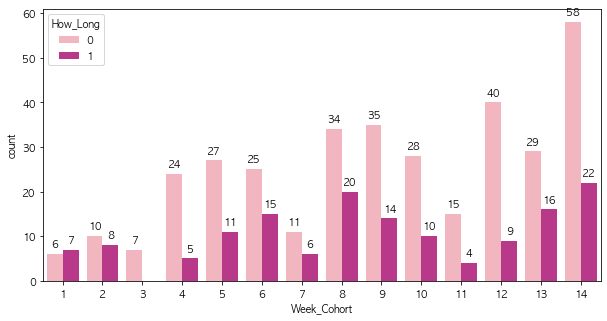

In [86]:
fig = plt.figure(figsize=(10,5)) 
splot = sns.countplot(
    x='Week_Cohort', 
    data=df_Activation_1,
    palette="RdPu",
    hue = "How_Long")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')


In [87]:
merge_left_whole = pd.merge(df_Activation_1,df, how="left", on="USER")
merge_left_whole.drop(["reg_date_y","order_date_y"],axis=1,inplace=True)
merge_left_whole.rename(columns={"reg_date_x":"reg_date", "order_date_x":"order_date"},inplace=True)

In [88]:
merge_left_whole

,USER,reg_date,order_date,FirstOrder,How_Long,Week_Cohort,brandnm,goodsnm,p_type,sub_type,app_yn
0,a1143028,2021-01-14,2021-01-15,2021-01-15,1,2,Gucci,dionysus cross bag,4days,BA,Y
1,a1143143,2021-01-15,2021-01-15,2021-01-15,0,2,Prada,logo hobo bag black,4days,BA,Y
2,a1142921,2021-01-14,2021-01-14,2021-01-14,0,2,Gucci,microssima mini cross body bag pink,4days,BA,Y
3,a1142921,2021-01-14,2021-01-14,2021-01-14,0,2,Time,pocket basic pattern coat black,4days,O,Y
4,a1142921,2021-01-14,2021-01-14,2021-01-14,0,2,Gucci,microssima mini cross body bag pink,4days,BA,Y
...,...,...,...,...,...,...,...,...,...,...,...
653,a1147932,2021-03-01,2021-03-01,2021-03-01,0,10,London Fog,button basic pattern coat grey,4days,O,Y
654,a1147932,2021-03-01,2021-03-01,2021-03-01,0,10,Burberry London,embroidery basic pattern wool sweater brown,4days,T,Y
655,a1147932,2021-03-01,2021-03-01,2021-03-01,0,10,London Fog,button basic pattern coat grey,4days,O,Y
656,a1147848,2021-02-28,2021-03-01,2021-03-01,1,10,Burberry,basic pattern sweater beige,7days,T,Y


In [90]:
len(df_Activation_1)/len(df) * 100

33.71855880353501